# Taxi-v2

Loading the libraries

In [1]:
import numpy as np, gym, random,gym_gridworlds
import matplotlib.pyplot as plt
import seaborn as sns
env = gym.make('Taxi-v2')

/home/karthik/.local/lib/python2.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [2]:
from time import time

In [3]:
env.action_space.n

6

In [6]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
   
    V = np.zeros(env.env.nS)    
    while True:       
        delta = 0        
        for state in range(env.env.nS):  
            val = 0              
            for action,act_prob in enumerate(policy[state]): 
                for prob,next_state,reward,done in env.env.P[state][action]:  
                    val += act_prob * prob * (reward + discount_factor * V[next_state])  
            delta = max(delta, np.abs(val-V[state]))
            V[state] = val
        if delta < theta:  
            break        
    return np.array(V)

# Policy-Iteration

In [7]:
time_array=[]

In [8]:
def policy_iteration(env, policy_eval_fn=policy_eval, discount_factor=1.0):
    
    policy_counter = 0
    def one_step_lookahead(state, V):
       
        A = np.zeros(env.env.nA)
        for a in range(env.env.nA):
            for prob, next_state, reward, done in env.env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A
 
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

    while True:
        start = time()
        policy_counter +=1
       
        curr_pol_val = policy_eval_fn(policy, env, discount_factor)  
        policy_stable = True  
        for state in range(env.env.nS): 
            chosen_act = np.argmax(policy[state])  
            act_values = one_step_lookahead(state,curr_pol_val)  
            best_act = np.argmax(act_values) 
            if chosen_act != best_act:
                policy_stable = False  
            policy[state] = np.eye(env.env.nA)[best_act] 
        if policy_stable:
            return policy, curr_pol_val
        print 'policy_counter',policy_counter
        end = time()
        print 'TIME',end-start
        time_array.append(end-start)
    
  
    return policy



In [9]:
start = time()
pol_iter_policy= policy_iteration(env,policy_eval,discount_factor=0.99)
end = time()
print 'time-taken in seconds',end-start
pol_iter_policy[0]

policy_counter 1
TIME 3.23438286781
policy_counter 2
TIME 4.86254096031
policy_counter 3
TIME 4.77794790268
policy_counter 4
TIME 4.78956913948
policy_counter 5
TIME 4.76171016693
policy_counter 6
TIME 4.90056610107
policy_counter 7
TIME 4.95105886459
policy_counter 8
TIME 5.35544109344
policy_counter 9
TIME 4.60130596161
time-taken in seconds 47.1488871574


array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [26]:
time_array = [3.20,5.23,5.14,5.24,5.40,5.24,5.21,5.30,5.31,5.23997]

In [27]:
iter_training  = [i for i in range(len(time_array))]

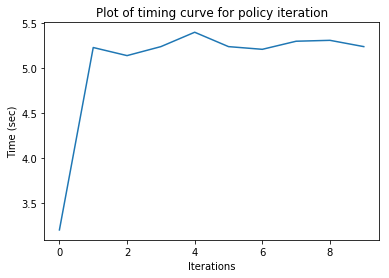

In [28]:
plt.plot(iter_training,time_array)
plt.xlabel('Iterations')
plt.ylabel('Time (sec)')
plt.title('Plot of timing curve for policy iteration')
plt.savefig('Timingcurve_policyiteration.png')

In [17]:
pol_iter_policy

(array([[0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]]),
 array([1978.99901398, 1857.33625444, 1897.07811877, 1837.76287228,
        1742.79321998, 1857.33625444, 1706.12160705, 1761.4072642 ,
        1818.38527255, 1742.79320113, 1897.07811877, 1761.4072642 ,
        1706.12162571, 1742.79320113, 1706.12160705, 1837.76287228,
        1999.99901398, 1877.10733758, 1917.25063498, 1857.33624458,
        1958.20902384, 1837.7628919 , 1877.10733758, 1818.38524355,
        1761.40730228, 1877.10733758, 1724.36526912, 1780.20936754,
        1799.20141982, 1724.36526912, 1877.10733758, 1742.79319156,
        1724.36528778, 1761.40728344, 1724.36526912, 1857.33624458,
        1978.99902384, 1897.07812863, 1897.07812863, 1877.10732772,
        1897.07814805, 1780.20938678, 1818.38526298, 1761.40727387,
        1818.38528202, 1937.62691

In [29]:
env.reset()
rewards = []
time_array=[]
cumulative_reward=[]

for episode in range(101):
    state = env.reset()
    if episode %20 ==0:
        env.render()
    step = 0
    done = False
    total_rewards = 0   
    start = time()
    for step in range(200):      
        action = np.argmax(pol_iter_policy[0][state,:])        
        new_state, reward, done, info = env.step(action)        
        total_rewards += reward        
        if done:
            rewards.append(total_rewards)           
            break
        state = new_state
    end = time()
    time_array.append(end-start)
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/100))

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Score over time: 8.72


In [30]:
cumulative_reward_policy =[];iterations_policy=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_policy.append(reward_sum)
    iterations_policy.append(i)

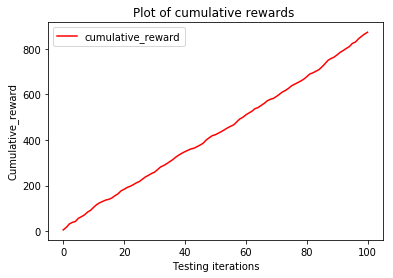

In [31]:
plt.plot(iterations_policy,cumulative_reward_policy,'r',label='cumulative_reward')
plt.xlabel('Testing iterations')
plt.ylabel('Cumulative_reward')
plt.legend()
plt.title('Plot of cumulative rewards ')
plt.savefig('Cumulativerewards_policyiteration.png')
plt.show()

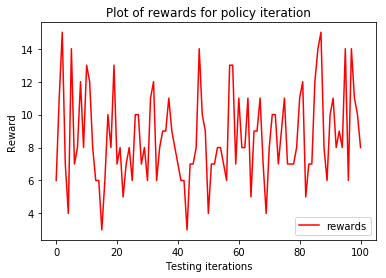

In [32]:
plt.plot(iterations_policy,rewards,'r',label='rewards')
plt.xlabel('Testing iterations')
plt.ylabel('Reward')
plt.title('Plot of rewards for policy iteration')
plt.savefig('reward_policyiteration.png')
plt.legend()
plt.show()

# Value-iteration

In [45]:
def value_iteration(env, theta=0.0001, discount_factor=1.0):
    value_counter = 0; 
  
    def one_step_lookahead(state, V):
       
        A = np.zeros(env.env.nA)
        for act in range(env.env.nA):
            for prob, next_state, reward, done in env.env.P[state][act]:
                A[act] += prob * (reward + discount_factor*V[next_state])
        return A
    
    V = np.zeros(env.env.nS)
    while True:
        start = time()
        delta = 0  #checker for improvements across states
        value_counter +=1
        for state in range(env.env.nS):           
            act_values = one_step_lookahead(state,V)  #lookahead one step
            best_act_value = np.max(act_values) #get best action value
            delta = max(delta,np.abs(best_act_value - V[state]))  #find max delta across all states
            V[state] = best_act_value  #update value to best action value
        if delta < theta:  #if max improvement less than threshold
            break
        end = time()
       
        print end-start
    policy = np.zeros([env.env.nS, env.env.nA])
    for state in range(env.env.nS):  #for all states, create deterministic policy
        act_val = one_step_lookahead(state,V)
        best_action = np.argmax(act_val)
        policy[state][best_action] = 1
        
    print 'value_counter',value_counter
    
    
    # Implement!
    
    return policy, V

In [46]:
start = time()
val_iter_policy= value_iteration(env,discount_factor=0.99)
end = time()
print 'time-taken in seconds',end-start
#val_iter_policy[0]

0.00609683990479
0.00524687767029
0.00553607940674
0.00520801544189
0.0055890083313
0.00801301002502
0.00596594810486
0.00571298599243
0.00658202171326
0.00545620918274
0.00545501708984
0.00504112243652
0.00485301017761
0.00492215156555
0.00489592552185
0.00494289398193
0.00499606132507
0.0050060749054
0.00587487220764
0.00526094436646
0.00494694709778
0.00494194030762
0.00494194030762
0.00489616394043
0.00485801696777
0.00492715835571
0.00493407249451
0.0049262046814
0.00516700744629
0.00505805015564
0.00493502616882
0.00487995147705
0.00484895706177
0.00486707687378
0.00489091873169
0.00491094589233
0.00488591194153
0.00487208366394
0.00573801994324
0.00531196594238
0.00533819198608
0.00520801544189
0.00623202323914
0.0060658454895
0.00525283813477
0.00510692596436
0.0050208568573
0.0049569606781
0.00498390197754
0.00496196746826
0.00504994392395
0.00490403175354
0.00496602058411
0.00494313240051
0.00492811203003
0.00478601455688
0.00494194030762
0.0048930644989
0.00496506690979
0.00

0.005774974823
0.00525712966919
0.00504779815674
0.00488209724426
0.00523090362549
0.00725698471069
0.00516819953918
0.00520801544189
0.00504398345947
0.00508999824524
0.006422996521
0.00512909889221
0.00486278533936
0.00499796867371
0.00492596626282
0.00492191314697
0.00500702857971
0.00502181053162
0.00497698783875
0.0049409866333
0.00502705574036
0.00496101379395
0.00501489639282
0.00493502616882
0.00496816635132
0.00567102432251
0.00585699081421
0.00504493713379
0.00498795509338
0.00485706329346
0.00494599342346
0.00497698783875
0.00489401817322
0.00499701499939
0.00678706169128
0.00538492202759
0.00526809692383
0.00510096549988
0.00479388237
0.0057430267334
0.00548410415649
0.0065770149231
0.00516200065613
0.00503301620483
0.00490784645081
0.00500583648682
0.00486993789673
0.00490093231201
0.00486898422241
0.00495195388794
0.00486993789673
0.00503897666931
0.00481486320496
0.00484800338745
0.0049159526825
0.00499510765076
0.00495719909668
0.00494480133057
0.00493288040161
0.004853

0.0053870677948
0.00535202026367
0.00518298149109
0.00496387481689
0.00500798225403
0.00503897666931
0.0049991607666
0.00546717643738
0.00710582733154
0.0057110786438
0.00522398948669
0.00511503219604
0.00590205192566
0.00522518157959
0.00508689880371
0.00490617752075
0.00487112998962
0.00505089759827
0.00495386123657
0.0047779083252
0.00494003295898
0.00491881370544
0.00498795509338
0.0050950050354
0.00487899780273
0.00482988357544
0.00487089157104
0.00486493110657
0.00477290153503
0.00746393203735
0.00947904586792
0.00836396217346
0.00629305839539
0.00613498687744
0.00556898117065
0.00553512573242
0.00849986076355
0.00742602348328
0.00572204589844
0.00625705718994
0.00677990913391
0.00558519363403
0.00603795051575
0.00597810745239
0.00838494300842
0.00728487968445
0.00940489768982
0.00661897659302
0.00579690933228
0.00559091567993
0.00616908073425
0.00695395469666
0.0100879669189
0.00888204574585
0.0059540271759
0.0053391456604
0.00595998764038
0.0053288936615
0.00516819953918
0.0054

In [47]:
print value_timing_array

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [48]:
env.reset()
rewards = []

for episode in range(101):
  #  print rewards
    state = env.reset()
    if episode %20 ==0:
        env.render()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(200):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
       # env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(val_iter_policy[0][state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/101))

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Score over time: 8.0396039604


In [49]:
val_iter_policy = value_iteration(env,discount_factor=0.99)
val_iter_policy[0]

0.00579810142517
0.00501012802124
0.00529098510742
0.00539803504944
0.00515103340149
0.00518608093262
0.00693392753601
0.00705909729004
0.0068039894104
0.00551891326904
0.00646591186523
0.00555896759033
0.00513505935669
0.00515913963318
0.00500416755676
0.00481104850769
0.00477600097656
0.00479412078857
0.00487017631531
0.00479102134705
0.00483202934265
0.00479412078857
0.00467610359192
0.00473499298096
0.0047869682312
0.00492310523987
0.00484299659729
0.00479197502136
0.00487184524536
0.0048131942749
0.00480794906616
0.00499892234802
0.00499105453491
0.00476694107056
0.00482892990112
0.00482892990112
0.0051589012146
0.00529313087463
0.00505304336548
0.00573801994324
0.00508117675781
0.00505900382996
0.00618410110474
0.0072329044342
0.00658297538757
0.00545001029968
0.00638198852539
0.00527501106262
0.00480914115906
0.00509214401245
0.00503587722778
0.00499296188354
0.00495314598083
0.00487494468689
0.00490307807922
0.00493693351746
0.00489592552185
0.00519108772278
0.0048508644104
0.0

0.00581789016724
0.0051281452179
0.00510382652283
0.00486397743225
0.00540900230408
0.00492787361145
0.00562787055969
0.00693607330322
0.00610613822937
0.00522685050964
0.00521993637085
0.00497889518738
0.00473213195801
0.00507998466492
0.00502514839172
0.00509881973267
0.00501608848572
0.00518608093262
0.00502681732178
0.00595998764038
0.00527811050415
0.00527596473694
0.00510215759277
0.00487899780273
0.0048930644989
0.00508213043213
0.00495791435242
0.00501394271851
0.00510811805725
0.00490498542786
0.00475692749023
0.00489592552185
0.0050220489502
0.00492787361145
0.00486397743225
0.00486612319946
0.00496196746826
0.00488710403442
0.00509095191956
0.0058970451355
0.00527405738831
0.00643610954285
0.00503897666931
0.00520491600037
0.00492811203003
0.00498414039612
0.00490713119507
0.00484490394592
0.00492691993713
0.00498414039612
0.00487112998962
0.00486207008362
0.00488090515137
0.00482296943665
0.00512504577637
0.00549221038818
0.0049901008606
0.00482892990112
0.00482511520386
0.

0.00595307350159
0.00582695007324
0.0120558738708
0.0119049549103
0.00745010375977
0.00633907318115
0.00701212882996
0.00623393058777
0.00566506385803
0.00584197044373
0.00560784339905
0.0055148601532
0.00550699234009
0.00554394721985
0.00564789772034
0.00539493560791
0.0055251121521
0.0053379535675
0.00550007820129
0.00546503067017
0.00560998916626
0.0060670375824
0.00585889816284
0.00574612617493
0.0053231716156
0.00550985336304
0.00557804107666
0.00551700592041
0.00552415847778
0.0066499710083
0.00582885742188
0.00571894645691
0.00666093826294
0.00593185424805
0.00832414627075
0.00640106201172
0.00593900680542
0.00594091415405
0.00572896003723
0.0055079460144
0.00577592849731
0.00566482543945
0.00567483901978
0.00572490692139
0.00574493408203
0.00569486618042
0.00568699836731
0.00561809539795
0.00571393966675
0.00577020645142
0.00564098358154
0.00545501708984
0.00564789772034
0.00560808181763
0.00555801391602
0.00560593605042
0.0054349899292
0.00536108016968
0.00555300712585
0.00551

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [54]:
cumulative_reward_value =[];iterations_value=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_value.append(reward_sum)
    iterations_value.append(i)

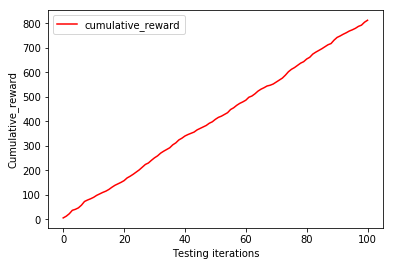

In [55]:
plt.plot(iterations_value,cumulative_reward_value,'r',label='cumulative_reward')
plt.xlabel('Testing iterations')
plt.ylabel('Cumulative_reward')
plt.savefig('Cumulative_reward_value.png')
plt.legend()
plt.show()

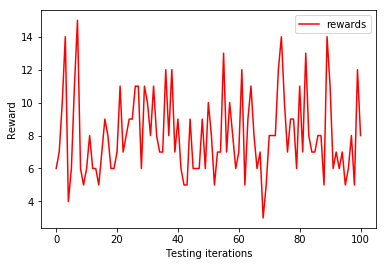

In [56]:
plt.plot(iterations_value,rewards,'r',label='rewards')
plt.xlabel('Testing iterations')
plt.ylabel('Reward')
plt.savefig('rewards_value.png')
plt.legend()
plt.show()

In [57]:
np.array_equiv(pol_iter_policy[0],val_iter_policy[0])

True

# Q-learning 

Epsilon-greedy algorithm

In [58]:
import random

def Q_learning_train(env,alpha,gamma,episodes): 
   
    epsilon = 1.0
    # For plotting metrics
    all_epochs = []
    all_penalties = []
    
    #Initialize Q table of 500 x 6 size (500 states and 6 actions) with all zeroes
    q_table = np.zeros([env.observation_space.n, env.action_space.n])  
    
    for i in range(1, episodes+1):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space randomly
            else:
                action = np.argmax(q_table[state]) # Exploit learned values by choosing optimal values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

            state = next_state
            epochs += 1
        epsilon *=0.95
        if i % 100 == 0:
            print 'Episode, epsilon %d %f'%(i,epsilon)
    # Start with a random policy
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

    for state in range(env.env.nS):  #for each states
        best_act = np.argmax(q_table[state]) #find best action
        policy[state] = np.eye(env.env.nA)[best_act]  #update 
        
    print("Training finished.\n")
    return policy,q_table

In [59]:

env.reset()
start = time()
Q_learn_pol = Q_learning_train(env,0.2,0.95,100000)
end = time()
print 'time taken', end-start

Episode, epsilon 100 0.005921
Episode, epsilon 200 0.000035
Episode, epsilon 300 0.000000
Episode, epsilon 400 0.000000
Episode, epsilon 500 0.000000
Episode, epsilon 600 0.000000
Episode, epsilon 700 0.000000
Episode, epsilon 800 0.000000
Episode, epsilon 900 0.000000
Episode, epsilon 1000 0.000000
Episode, epsilon 1100 0.000000
Episode, epsilon 1200 0.000000
Episode, epsilon 1300 0.000000
Episode, epsilon 1400 0.000000
Episode, epsilon 1500 0.000000
Episode, epsilon 1600 0.000000
Episode, epsilon 1700 0.000000
Episode, epsilon 1800 0.000000
Episode, epsilon 1900 0.000000
Episode, epsilon 2000 0.000000
Episode, epsilon 2100 0.000000
Episode, epsilon 2200 0.000000
Episode, epsilon 2300 0.000000
Episode, epsilon 2400 0.000000
Episode, epsilon 2500 0.000000
Episode, epsilon 2600 0.000000
Episode, epsilon 2700 0.000000
Episode, epsilon 2800 0.000000
Episode, epsilon 2900 0.000000
Episode, epsilon 3000 0.000000
Episode, epsilon 3100 0.000000
Episode, epsilon 3200 0.000000
Episode, epsilon 

Episode, epsilon 27100 0.000000
Episode, epsilon 27200 0.000000
Episode, epsilon 27300 0.000000
Episode, epsilon 27400 0.000000
Episode, epsilon 27500 0.000000
Episode, epsilon 27600 0.000000
Episode, epsilon 27700 0.000000
Episode, epsilon 27800 0.000000
Episode, epsilon 27900 0.000000
Episode, epsilon 28000 0.000000
Episode, epsilon 28100 0.000000
Episode, epsilon 28200 0.000000
Episode, epsilon 28300 0.000000
Episode, epsilon 28400 0.000000
Episode, epsilon 28500 0.000000
Episode, epsilon 28600 0.000000
Episode, epsilon 28700 0.000000
Episode, epsilon 28800 0.000000
Episode, epsilon 28900 0.000000
Episode, epsilon 29000 0.000000
Episode, epsilon 29100 0.000000
Episode, epsilon 29200 0.000000
Episode, epsilon 29300 0.000000
Episode, epsilon 29400 0.000000
Episode, epsilon 29500 0.000000
Episode, epsilon 29600 0.000000
Episode, epsilon 29700 0.000000
Episode, epsilon 29800 0.000000
Episode, epsilon 29900 0.000000
Episode, epsilon 30000 0.000000
Episode, epsilon 30100 0.000000
Episode,

Episode, epsilon 53600 0.000000
Episode, epsilon 53700 0.000000
Episode, epsilon 53800 0.000000
Episode, epsilon 53900 0.000000
Episode, epsilon 54000 0.000000
Episode, epsilon 54100 0.000000
Episode, epsilon 54200 0.000000
Episode, epsilon 54300 0.000000
Episode, epsilon 54400 0.000000
Episode, epsilon 54500 0.000000
Episode, epsilon 54600 0.000000
Episode, epsilon 54700 0.000000
Episode, epsilon 54800 0.000000
Episode, epsilon 54900 0.000000
Episode, epsilon 55000 0.000000
Episode, epsilon 55100 0.000000
Episode, epsilon 55200 0.000000
Episode, epsilon 55300 0.000000
Episode, epsilon 55400 0.000000
Episode, epsilon 55500 0.000000
Episode, epsilon 55600 0.000000
Episode, epsilon 55700 0.000000
Episode, epsilon 55800 0.000000
Episode, epsilon 55900 0.000000
Episode, epsilon 56000 0.000000
Episode, epsilon 56100 0.000000
Episode, epsilon 56200 0.000000
Episode, epsilon 56300 0.000000
Episode, epsilon 56400 0.000000
Episode, epsilon 56500 0.000000
Episode, epsilon 56600 0.000000
Episode,

Episode, epsilon 79400 0.000000
Episode, epsilon 79500 0.000000
Episode, epsilon 79600 0.000000
Episode, epsilon 79700 0.000000
Episode, epsilon 79800 0.000000
Episode, epsilon 79900 0.000000
Episode, epsilon 80000 0.000000
Episode, epsilon 80100 0.000000
Episode, epsilon 80200 0.000000
Episode, epsilon 80300 0.000000
Episode, epsilon 80400 0.000000
Episode, epsilon 80500 0.000000
Episode, epsilon 80600 0.000000
Episode, epsilon 80700 0.000000
Episode, epsilon 80800 0.000000
Episode, epsilon 80900 0.000000
Episode, epsilon 81000 0.000000
Episode, epsilon 81100 0.000000
Episode, epsilon 81200 0.000000
Episode, epsilon 81300 0.000000
Episode, epsilon 81400 0.000000
Episode, epsilon 81500 0.000000
Episode, epsilon 81600 0.000000
Episode, epsilon 81700 0.000000
Episode, epsilon 81800 0.000000
Episode, epsilon 81900 0.000000
Episode, epsilon 82000 0.000000
Episode, epsilon 82100 0.000000
Episode, epsilon 82200 0.000000
Episode, epsilon 82300 0.000000
Episode, epsilon 82400 0.000000
Episode,

In [60]:
q_table = Q_learn_pol[0]
env.reset()
rewards = []

for episode in range(100):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(200):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/100))

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |


+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: 

In [61]:
cumulative_reward_qlearning =[];iterations_qlearning=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_qlearning.append(reward_sum)
    iterations_qlearning .append(i)

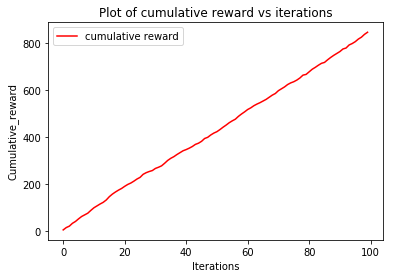

In [63]:
plt.plot(iterations_qlearning,cumulative_reward_qlearning,'r',label='cumulative reward')
plt.xlabel('Iterations')
plt.ylabel('Cumulative_reward')
plt.title('Plot of cumulative reward vs iterations')
plt.legend()
plt.savefig('cumulativefig_qlearning.png')
plt.show()

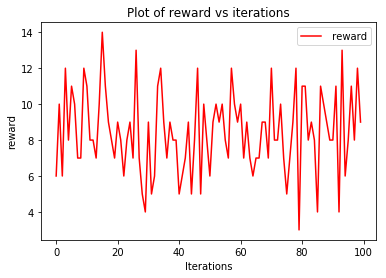

In [64]:
plt.plot(iterations_qlearning,rewards,'r',label=' reward')
plt.xlabel('Iterations')
plt.ylabel('reward')
plt.title('Plot of reward vs iterations')
plt.legend()
plt.savefig('rewards_qlearning.png')
plt.show()

Greedy-algorithm

In [1]:
import random

def Q_learning_train(env,alpha,gamma,episodes): 
   

    # For plotting metrics
    all_epochs = []
    all_penalties = []
    
    #Initialize Q table of 500 x 6 size (500 states and 6 actions) with all zeroes
    q_table = np.zeros([env.observation_space.n, env.action_space.n])  
    
    for i in range(1, episodes+1):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            #if random.uniform(0, 1) < epsilon:
             #   action = env.action_space.sample() # Explore action space randomly
            #else:
            action = env.action_space.sample()
           # action = np.argmax(q_table[state]) # Exploit learned values by choosing optimal values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

            state = next_state
            epochs += 1

        if i % 100 == 0:
            print 'Episode %d'%(i)
    # Start with a random policy
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

    for state in range(env.env.nS):  #for each states
        best_act = np.argmax(q_table[state]) #find best action
        policy[state] = np.eye(env.env.nA)[best_act]  #update 
        
    print("Training finished.\n")
    return policy,q_table

In [3]:
from time import time

In [8]:
start = time()
env.reset()
Q_learn_pol = Q_learning_train(env,0.2,0.95,100000)
end = time()
print 'time taken', end-start

Episode 100
Episode 200
Episode 300
Episode 400
Episode 500
Episode 600
Episode 700
Episode 800
Episode 900
Episode 1000
Episode 1100
Episode 1200
Episode 1300
Episode 1400
Episode 1500
Episode 1600
Episode 1700
Episode 1800
Episode 1900
Episode 2000
Episode 2100
Episode 2200
Episode 2300
Episode 2400
Episode 2500
Episode 2600
Episode 2700
Episode 2800
Episode 2900
Episode 3000
Episode 3100
Episode 3200
Episode 3300
Episode 3400
Episode 3500
Episode 3600
Episode 3700
Episode 3800
Episode 3900
Episode 4000
Episode 4100
Episode 4200
Episode 4300
Episode 4400
Episode 4500
Episode 4600
Episode 4700
Episode 4800
Episode 4900
Episode 5000
Episode 5100
Episode 5200
Episode 5300
Episode 5400
Episode 5500
Episode 5600
Episode 5700
Episode 5800
Episode 5900
Episode 6000
Episode 6100
Episode 6200
Episode 6300
Episode 6400
Episode 6500
Episode 6600
Episode 6700
Episode 6800
Episode 6900
Episode 7000
Episode 7100
Episode 7200
Episode 7300
Episode 7400
Episode 7500
Episode 7600
Episode 7700
Episode 

Episode 59400
Episode 59500
Episode 59600
Episode 59700
Episode 59800
Episode 59900
Episode 60000
Episode 60100
Episode 60200
Episode 60300
Episode 60400
Episode 60500
Episode 60600
Episode 60700
Episode 60800
Episode 60900
Episode 61000
Episode 61100
Episode 61200
Episode 61300
Episode 61400
Episode 61500
Episode 61600
Episode 61700
Episode 61800
Episode 61900
Episode 62000
Episode 62100
Episode 62200
Episode 62300
Episode 62400
Episode 62500
Episode 62600
Episode 62700
Episode 62800
Episode 62900
Episode 63000
Episode 63100
Episode 63200
Episode 63300
Episode 63400
Episode 63500
Episode 63600
Episode 63700
Episode 63800
Episode 63900
Episode 64000
Episode 64100
Episode 64200
Episode 64300
Episode 64400
Episode 64500
Episode 64600
Episode 64700
Episode 64800
Episode 64900
Episode 65000
Episode 65100
Episode 65200
Episode 65300
Episode 65400
Episode 65500
Episode 65600
Episode 65700
Episode 65800
Episode 65900
Episode 66000
Episode 66100
Episode 66200
Episode 66300
Episode 66400
Episod

In [9]:
q_table = Q_learn_pol[0]
env.reset()
rewards = []

for episode in range(100):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(200):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/100))

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: |_: :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : :_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: 

In [10]:
cumulative_reward_qlearning =[];iterations_qlearning=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_qlearning.append(reward_sum)
    iterations_qlearning .append(i)

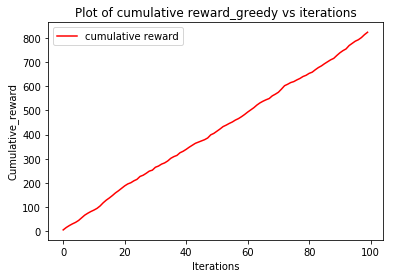

In [11]:
plt.plot(iterations_qlearning,cumulative_reward_qlearning,'r',label='cumulative reward')
plt.xlabel('Iterations')
plt.ylabel('Cumulative_reward')
plt.title('Plot of cumulative reward_greedy vs iterations')
plt.legend()
plt.savefig('cumulativefig_greedy_qlearning.png')
plt.show()

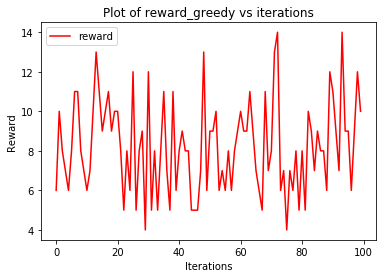

In [12]:
plt.plot(iterations_qlearning,rewards,'r',label='reward')
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Plot of reward_greedy vs iterations')
plt.legend()
plt.savefig('rewardfig_greedy_qlearning.png')
plt.show()

# END